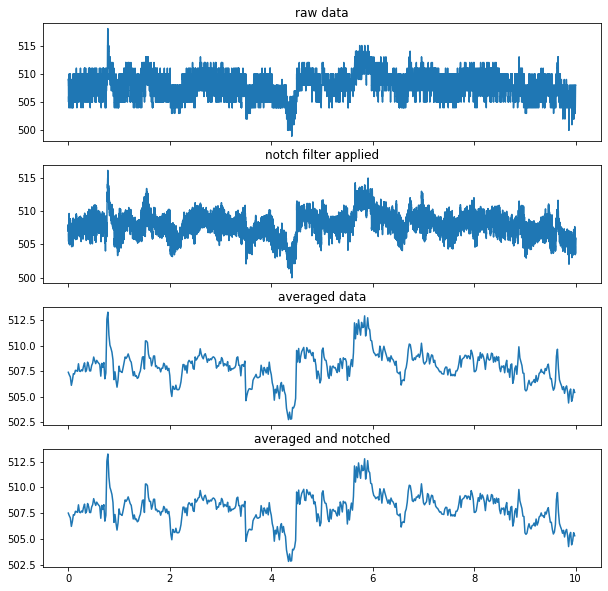

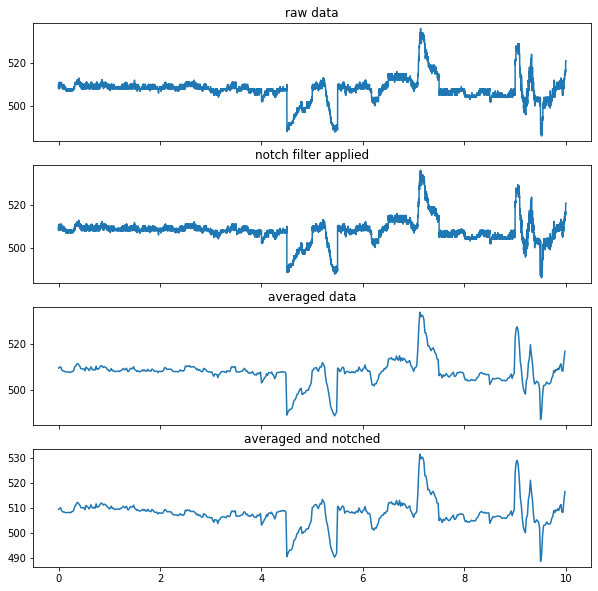

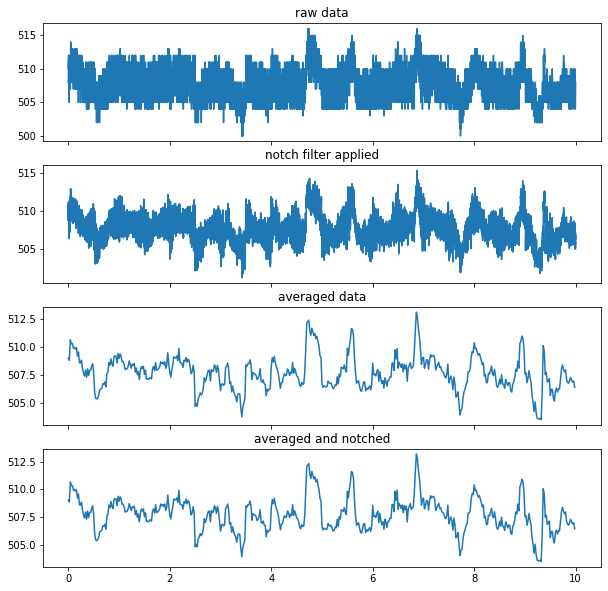

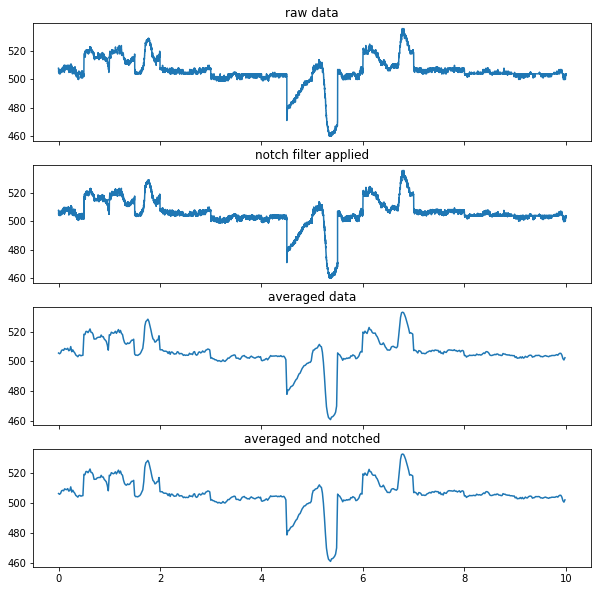

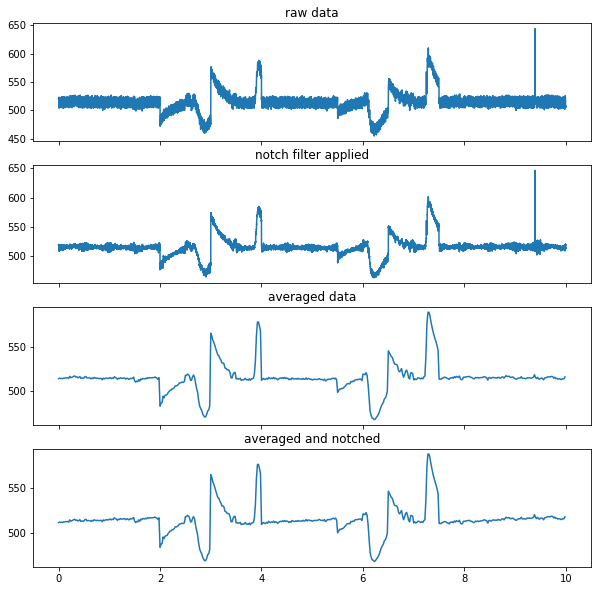

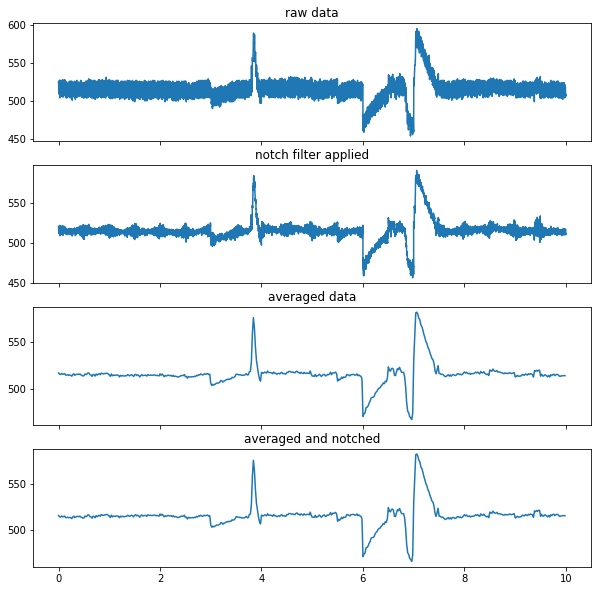

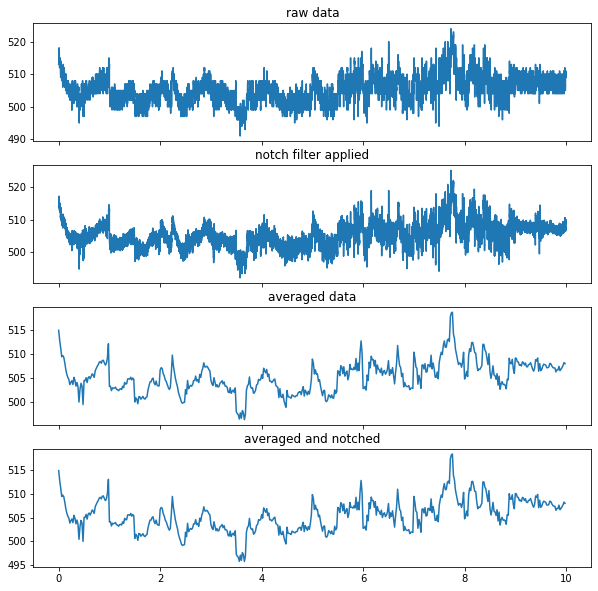

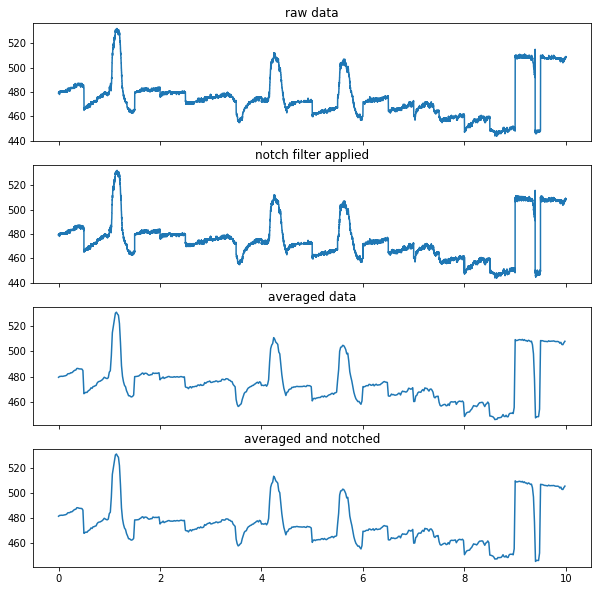

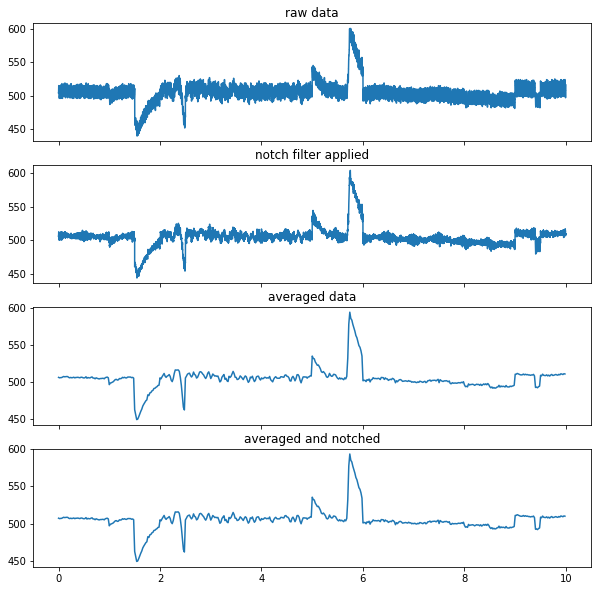

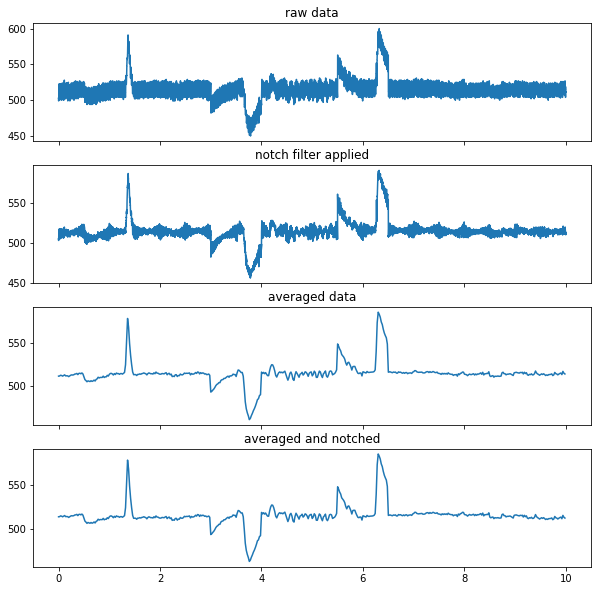

In [18]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import rfftfreq, irfft, rfft, fft, ifft
import matplotlib.pyplot as plt
import os

dir = '/Users/nadasalama/Documents/uni/sem 1 2021/PHYS3888/filter/data'
os.chdir(dir)
filenames = os.listdir(dir)
filenames.remove('.DS_Store')
filenames.remove('.pdf.png')
for file in filenames:
    file = open(file, 'r')
    f = file.readlines()

    
    time_ls = []
    amp_ls = []
    i = 0

    for line in f:
        line = line.strip('\n').split(' ')
        time = line[0]
        time_ls.append(float(time))
        amp = line[1]
        amp_ls.append(float(amp))

    #Taking rolling average for x points
    a1 = []
    time_ = []
    x = 200;
    while i <len(amp_ls):
        a1.append(np.mean(amp_ls[i:i+x]))     
        time_.append(time_ls[i])
        i += x

    # Design notch filter  
    fs = 10000.0  # Sample frequency (Hz)
    f0 = 50.26658  # Frequency to be removed from signal (Hz)
    Q = 20  # Quality factor
    b, a = signal.iirnotch(f0, Q, fs)
    freq, h = signal.freqz(b, a, fs=fs)

    y_notched_unaveraged = signal.filtfilt(b, a, amp_ls)

    # applying notch filter to average data
    y_notched_averaged = signal.filtfilt(b, a, a1)

    fig, axs = plt.subplots(4, sharex=True)
    fig.set_size_inches(10, 10)

    axs[0].plot(time_ls,amp_ls)
    axs[0].set_title('raw data')
    axs[1].plot(time_ls,y_notched_unaveraged)
    axs[1].set_title('notch filter applied')
    axs[2].plot(time_,a1)
    axs[2].set_title('averaged data')
    axs[3].plot(time_,y_notched_averaged)
    axs[3].set_title('averaged and notched')
#     fig.savefig('/Users/nadasalama/Documents/uni/sem 1 2021/PHYS3888/filter/fig/' + str(file) + '.pdf', dpi=100)

Text(0.5, 1, 'averaged notched')

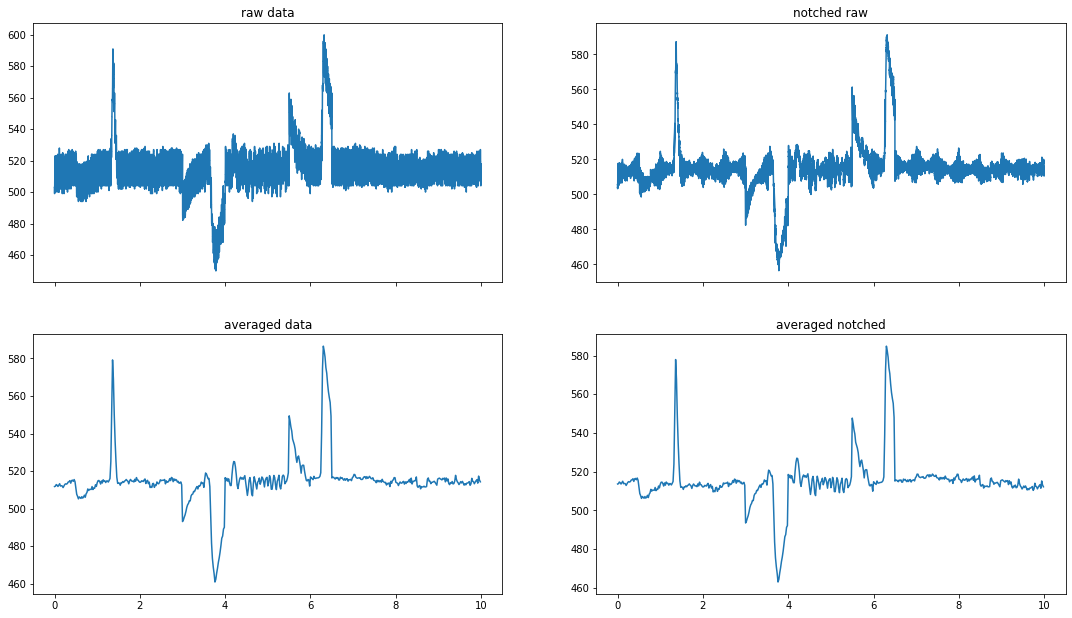

In [2]:
fig, axs = plt.subplots(2,2, sharex=True)

fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=100)

axs[0,0].plot(time_ls,amp_ls)
axs[0,0].set_title('raw data')
axs[0,1].plot(time_ls,y_notched_unaveraged)
axs[0,1].set_title('notched raw')
axs[1,0].plot(time_,a1)
axs[1,0].set_title('averaged data')
axs[1,1].plot(time_,y_notched_averaged)
axs[1,1].set_title('averaged notched')

/Users/nadasalama/Documents/uni/sem 1 2021/PHYS3888/filter/fig/file.pdf


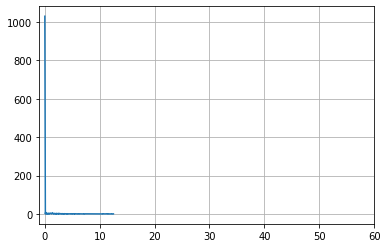

In [3]:
# plot power spectrum
N = int(len(time_))
T = float(time_[1])
x = time_
xf = rfftfreq(N, T)[:N//2]
yf = rfft(a1)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
#plt.ylim(0, 1000)
plt.xlim(-1, 60)
plt.show()

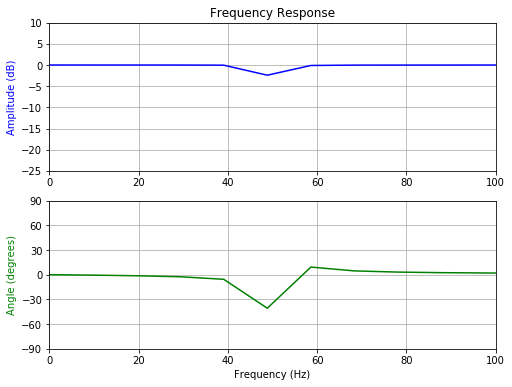

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([-25, 10])
ax[0].grid()
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid()
plt.show()